Data preparation done in previous problem.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle                  
import sklearn.preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
brazil_df = pd.read_excel("dataset.xlsx")
brazil_enc=brazil_df[["SARS-Cov-2 exam result", "Patient age quantile","Proteina C reativa mg/dL","Neutrophils","Mean platelet volume ","Monocytes","Red blood cell distribution width (RDW)","Red blood Cells","Platelets","Eosinophils","Basophils","Leukocytes","Mean corpuscular hemoglobin (MCH)","Mean corpuscular volume (MCV)","Mean corpuscular hemoglobin concentration (MCHC)","Lymphocytes","Hemoglobin","Hematocrit",'Influenza B', 'Influenza A']]
brazil_enc= brazil_enc.dropna(axis=0, thresh=9)
brazil_enc = brazil_enc.fillna(brazil_enc.median()).round(2)
#Mapping positive case and negative case to binary
covid_exam_map = {'negative':0, 'positive': 1}
brazil_enc['SARS-Cov-2 exam result'] = brazil_enc['SARS-Cov-2 exam result'].map(covid_exam_map)
#Mapping detected case and not_detectede case to binary for Influenza B
inf_exam_map = {'not_detected':0, 'detected': 1}
brazil_enc['Influenza B'] = brazil_enc['Influenza B'].map(inf_exam_map)
#Mapping detected case and not_detectede case to binary for Influenza A
brazil_enc['Influenza A'] = brazil_enc['Influenza A'].map(inf_exam_map)
brazil_enc = pd.get_dummies(brazil_enc, columns=["Influenza A", "Influenza B"], dummy_na=True)


Spliting data for Training and Testing 

In [19]:
from sklearn.model_selection import train_test_split

y = brazil_enc['SARS-Cov-2 exam result'].copy()
X =  brazil_enc.drop(['SARS-Cov-2 exam result'], axis=1).copy()
X_mat = pd.get_dummies(X)

#70% training and 30% testing.
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=10)

In [20]:
#scaling 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [21]:
#create NN with default values
from sklearn.neural_network import MLPClassifier

model_1 = MLPClassifier(random_state=10)
model_1.fit(X_train, y_train)

print("Train accuracy:", model_1.score(X_train, y_train))
print("Test accuracy:", model_1.score(X_test, y_test))

y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_1)

Train accuracy: 0.9548693586698337
Test accuracy: 0.8784530386740331
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       156
           1       0.58      0.44      0.50        25

    accuracy                           0.88       181
   macro avg       0.75      0.69      0.72       181
weighted avg       0.87      0.88      0.87       181

MLPClassifier(random_state=10)


C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


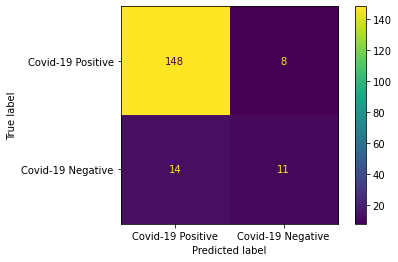

In [22]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_1,X_test,y_test,display_labels=["Covid-19 Positive","Covid-19 Negative"])

As expected there model did not sucessfully converge. Next step increase value of max_iter

After trying multiple value of max_iter until 900, model did not throw ConvergenceWarning. Notice the Traing and test accuracy .

In [23]:
model_2 = MLPClassifier(max_iter=900, random_state=10)
model_2.fit(X_train, y_train)

print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))

y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_2)

Train accuracy: 1.0
Test accuracy: 0.9005524861878453
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       156
           1       0.65      0.60      0.63        25

    accuracy                           0.90       181
   macro avg       0.79      0.77      0.78       181
weighted avg       0.90      0.90      0.90       181

MLPClassifier(max_iter=900, random_state=10)


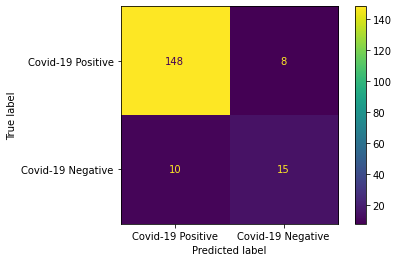

In [24]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_2,X_test,y_test,display_labels=["Covid-19 Positive","Covid-19 Negative"])

In [25]:
print(X_train.shape)

(421, 23)


Our traiing set has 23 feature we start with hidden layer from 2 to 22 neurons 

In [31]:
from sklearn.model_selection import GridSearchCV
params = {'hidden_layer_sizes': [(x,) for x in range(2, 22, 1)]}

cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=10),return_train_score=True, cv=10,)
cv_1.fit(X_train, y_train)

C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=10),
             param_grid={'hidden_layer_sizes': [(2,), (3,), (4,), (5,), (6,),
                                                (7,), (8,), (9,), (10,), (11,),
                                                (12,), (13,), (14,), (15,),
                                                (16,), (17,), (18,), (19,),
                                                (20,), (21,)]},
             return_train_score=True)

In [32]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_1.best_params_)

Train accuracy: 0.9287410926365796
Test accuracy: 0.8784530386740331
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       156
           1       0.62      0.32      0.42        25

    accuracy                           0.88       181
   macro avg       0.76      0.64      0.68       181
weighted avg       0.86      0.88      0.86       181

{'hidden_layer_sizes': (20,)}


 **GridSearchCV returns 20 neurons** as the optimal number of neurons in the hidden layer. Look like our NN is complex, Running gridsearch with differnet parameter. 

In [35]:
params = {'hidden_layer_sizes': [(18,), (19,), (20,), (22,)]}

cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=10), cv=10, n_jobs=-1)
cv_2.fit(X_train, y_train)

print("Train accuracy:", cv_2.score(X_train, y_train))
print("Test accuracy:", cv_2.score(X_test, y_test))

y_pred = cv_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)

Train accuracy: 0.9287410926365796
Test accuracy: 0.8784530386740331
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       156
           1       0.62      0.32      0.42        25

    accuracy                           0.88       181
   macro avg       0.76      0.64      0.68       181
weighted avg       0.86      0.88      0.86       181

{'hidden_layer_sizes': (20,)}


C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Look like 20 is our number of no of neuron for hidden layer .

Plotting CM for new NN.

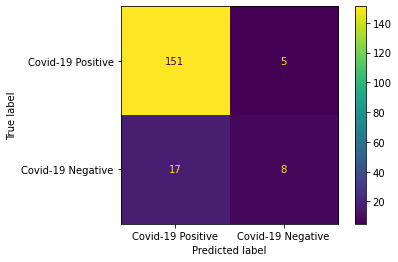

In [36]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cv_2.best_estimator_,X_test,y_test,display_labels=["Covid-19 Positive","Covid-19 Negative"])

Next Step:determine value of alpha 

In [38]:
params = {'hidden_layer_sizes': [(18,), (19,), (20,), (22,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_3 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=10), cv=10, n_jobs=-1)
cv_3.fit(X_train, y_train)

print("Train accuracy:", cv_3.score(X_train, y_train))
print("Test accuracy:", cv_3.score(X_test, y_test))

y_pred = cv_3.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_3.best_params_)

Train accuracy: 0.9287410926365796
Test accuracy: 0.8784530386740331
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       156
           1       0.62      0.32      0.42        25

    accuracy                           0.88       181
   macro avg       0.76      0.64      0.68       181
weighted avg       0.86      0.88      0.86       181

{'alpha': 0.01, 'hidden_layer_sizes': (20,)}


C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Our alpha value is 0.01 which is faster.
Next step Dimension reduction with Recursive Feature Elimination. 
use Logistic Regression as the base elimination model (Doug will explain)

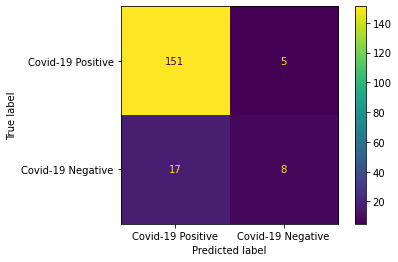

In [42]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cv_3.best_estimator_,X_test,y_test,display_labels=["Covid-19 Positive","Covid-19 Negative"])

In [39]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

rfe = RFECV(estimator = LogisticRegression(random_state=10), cv=10)
rfe.fit(X_train, y_train)

print(rfe.n_features_)

8


RFE have selected 8 feature . Using all findings for new model

In [41]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# step = int((X_train_rfe.shape[1] + 5)/5);
params = {'hidden_layer_sizes': [(18,), (19,), (20,), (22,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

rfe_cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=10), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_rfe, y_train)

print("Train accuracy:", rfe_cv.score(X_train_rfe, y_train))
print("Test accuracy:", rfe_cv.score(X_test_rfe, y_test))

y_pred = rfe_cv.predict(X_test_rfe)
print(classification_report(y_test, y_pred))

print(rfe_cv.best_params_)

Train accuracy: 0.9049881235154394
Test accuracy: 0.8784530386740331
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       156
           1       0.60      0.36      0.45        25

    accuracy                           0.88       181
   macro avg       0.75      0.66      0.69       181
weighted avg       0.86      0.88      0.87       181

{'alpha': 0.01, 'hidden_layer_sizes': (22,)}


C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RFE did not show any improvement over cv_2 or cv3 since both of them are identical

**use the decision tree model to perform feature selection for neural network modelling.**

In [46]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
print(dt_best.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}


In [48]:
#analyse_feature_importance(dt_best.best_estimator_, X.columns)

importances = dt_best.feature_importances_
# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:n_to_display]
for i in indices:
    print(feature_names[i], ':', importances[i])

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

In [49]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(421, 5)


The decision tree model identfies the set of 5 variables as important features. Proceed to tune a MLPClassifier with this modified dataset.

NN from Decision Tree

In [51]:
params = {'hidden_layer_sizes': [(18,), (19,), (20,), (22,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=10), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)

Train accuracy: 0.9121140142517815
Test accuracy: 0.8895027624309392
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       156
           1       0.67      0.40      0.50        25

    accuracy                           0.89       181
   macro avg       0.79      0.68      0.72       181
weighted avg       0.88      0.89      0.88       181

{'alpha': 0.01, 'hidden_layer_sizes': (19,)}


C:\Users\GK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


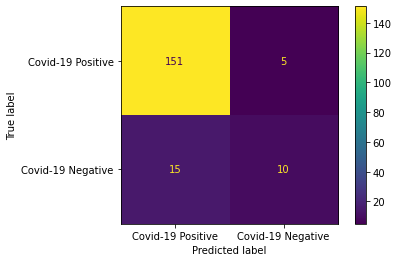

In [54]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cv_sel_model,X_test_sel_model,y_test,display_labels=["Covid-19 Positive","Covid-19 Negative"])

The Neural Network model trained with decision tree selected variables did manage to improve model performance

# Different Models


A total of seven models has been built:
    1. Default neural network (`model_1`)
    2. Neural network with relu (`model_2`)
    3. Neural network + grid search (`cv_1`)(find size of hidden layer,20)
    4. Neural network + grid search (`cv_2`)(Running GScv with different parameter . Still 20)
    5. Neural network + grid search (`cv_3`)(determine value of alpha)
    6. Neural network + feature selection + grid search (`rfe_cv`)
    7. Neural network + feature selection using DT + grid search (`cv_sel_model`)(with Decision Tree)A **Best so Far**
    
Now, let us use ROC curve to compare these models to identify the best performing neural network model.


In [55]:
from sklearn.metrics import roc_auc_score

y_pred_proba_nn_1 = model_1.predict_proba(X_test)
y_pred_proba_nn_2 = model_2.predict_proba(X_test)
y_pred_proba_cv_1 = cv_1.predict_proba(X_test)
y_pred_proba_cv_2 = cv_2.predict_proba(X_test)
y_pred_proba_cv_3 = cv_3.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_rfe)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)


roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])
roc_index_nn_2 = roc_auc_score(y_test, y_pred_proba_nn_2[:, 1])
roc_index_cv_1 = roc_auc_score(y_test, y_pred_proba_cv_1[:, 1])
roc_index_cv_2 = roc_auc_score(y_test, y_pred_proba_cv_2[:, 1])
roc_index_cv_3 = roc_auc_score(y_test, y_pred_proba_cv_3[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])


print("ROC index on test for NN_default:", roc_index_nn_1)
print("ROC index on test for NN with relu:", roc_index_nn_2)
print("ROC index on test for NN with gridsearch 1:", roc_index_cv_1)
print("ROC index on test for NN with gridsearch 2:", roc_index_cv_2)
print("ROC index on test for NN with gridsearch 3:", roc_index_cv_3)
print("ROC index on test for NN with feature selection and gridsearch:", roc_index_rfe_cv)
print("ROC index on test for NN with feature selection (model selection) and gridsearch:", roc_index_cv_sel_model)

from sklearn.metrics import roc_curve

fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])
fpr_nn_2, tpr_nn_2, thresholds_nn_2 = roc_curve(y_test, y_pred_proba_nn_2[:,1])
fpr_cv_1, tpr_cv_1, thresholds_cv_1 = roc_curve(y_test, y_pred_proba_cv_1[:,1])
fpr_cv_2, tpr_cv_2, thresholds_cv_2 = roc_curve(y_test, y_pred_proba_cv_2[:,1])
fpr_cv_3, tpr_cv_3, thresholds_cv_3 = roc_curve(y_test, y_pred_proba_cv_3[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

ROC index on test for NN_default: 0.8689743589743589
ROC index on test for NN with relu: 0.8643589743589744
ROC index on test for NN with gridsearch 1: 0.8674358974358976
ROC index on test for NN with gridsearch 2: 0.8674358974358976
ROC index on test for NN with gridsearch 3: 0.867948717948718
ROC index on test for NN with feature selection and gridsearch: 0.8635897435897436
ROC index on test for NN with feature selection (model selection) and gridsearch: 0.8664102564102564


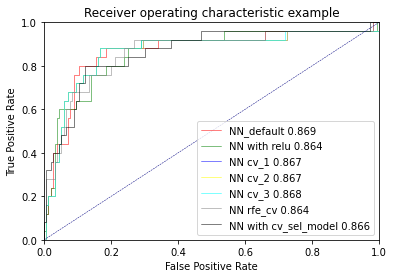

In [58]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.3f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_nn_2, tpr_nn_2, label='NN with relu {:.3f}'.format(roc_index_nn_2), color='green', lw=0.5)
plt.plot(fpr_cv_1, tpr_cv_1, label='NN cv_1 {:.3f}'.format(roc_index_cv_1), color='blue', lw=0.5)
plt.plot(fpr_cv_2, tpr_cv_2, label='NN cv_2 {:.3f}'.format(roc_index_cv_2), color='yellow', lw=0.5)
plt.plot(fpr_cv_3, tpr_cv_3, label='NN cv_3 {:.3f}'.format(roc_index_cv_3), color='cyan', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='NN rfe_cv {:.3f}'.format(roc_index_rfe_cv), color='gray', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), color='black', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()